In [97]:
#importing all related libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
data=pd.read_csv("D:\\My_Uber_Drives.csv") #importing data

In [99]:
data.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [100]:
data = data.drop(data.index[len(data)-1])

In [101]:
data.shape

(1155, 7)

In [102]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [103]:
data.keys()

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [105]:
data["PURPOSE*"].replace(np.nan,"Other",inplace=True) ##replacing missing values with PURPOSE* equals to "other"
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [106]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Other
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [107]:
data["PURPOSE*"].value_counts()

Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [108]:
#creating a dataframe containing type of purpose and the number of rides associated with each purpose
ride_count = data['PURPOSE*'].value_counts().tolist()
ride_purpose= data['PURPOSE*'].value_counts().index.tolist()
ride_info = list(zip(ride_purpose,ride_count))
ride_info = pd.DataFrame(ride_info,columns=['PURPOSE','COUNT'])

In [109]:
ride_info

,PURPOSE,COUNT
0,Other,502
1,Meeting,187
2,Meal/Entertain,160
3,Errand/Supplies,128
4,Customer Visit,101
5,Temporary Site,50
6,Between Offices,18
7,Moving,4
8,Airport/Travel,3
9,Charity ($),1


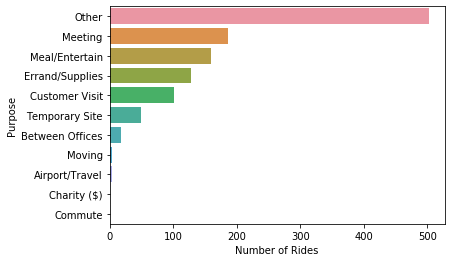

In [110]:
ax = sns.barplot(x='COUNT',y='PURPOSE',data=ride_info,order=ride_info['PURPOSE'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.show()

In [111]:
data['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [112]:
ride_summary = data.groupby('PURPOSE*').mean()
ride_summary

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


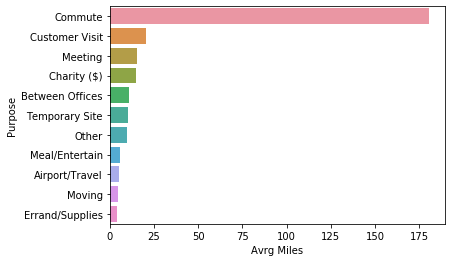

In [113]:
ride_summary['PURPOSE*']=ride_summary.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=ride_summary,order=ride_summary.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

In [114]:
start_list = [info.split(' ') for info in data['START_DATE*'].tolist()]
stop_list = [info.split(' ') for info in data['END_DATE*'].tolist()]

start_df  = pd.DataFrame(start_list,columns=['Start_Date','Start_Time'])
end_df  = pd.DataFrame(stop_list,columns=['End_Date','End_Time'])

sub_data = data[['CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
start_end_info = pd.concat([start_df,end_df,],axis=1)

In [115]:
rides = pd.concat([start_end_info,sub_data],axis=1)

In [116]:
rides.head(5)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,Other
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [117]:
rides.groupby('Start_Date').sum()

,MILES*
Start_Date,
1/1/2016,5.1
1/10/2016,49.3
1/11/2016,11.6
1/12/2016,27.2
1/13/2016,23.0
...,...
9/28/2016,20.5
9/29/2016,12.6
9/30/2016,54.4


In [118]:
rides_per_month = rides.groupby('Start_Date').sum()
rides_per_month['Month']=pd.to_datetime(rides_per_month.index.tolist()) #converting dates to a python friendly format
rides_per_month['Month']= rides_per_month['Month'].dt.to_period("M") #grouping dates by month
rides_per_month= rides_per_month.sort_values(by= 'Month',ascending=True)

In [119]:
total_miles_per_month= rides_per_month.groupby('Month').sum()

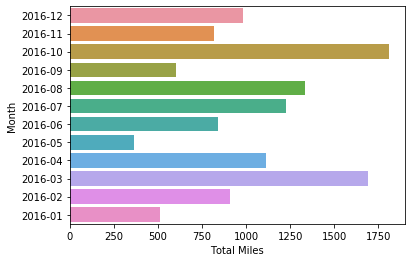

In [120]:
total_miles_per_month['MONTH']=total_miles_per_month.index.tolist()
total_miles_per_month['MONTH']=total_miles_per_month['MONTH'].astype(str) #converting the time stamp format to string
ax = sns.barplot(x='MILES*',y='MONTH',data=total_miles_per_month,order=total_miles_per_month.sort_values('MONTH',ascending=False)['MONTH'].tolist())
ax.set(xlabel='Total Miles', ylabel='Month')
plt.show()

In [121]:
g = nx.Graph()

In [122]:
g= nx.from_pandas_edgelist(rides,source='START*',target='STOP*',edge_attr=['Start_Date','Start_Time','End_Date','End_Time','CATEGORY*','MILES*','PURPOSE*'])

In [123]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 280
Average degree:   2.6794


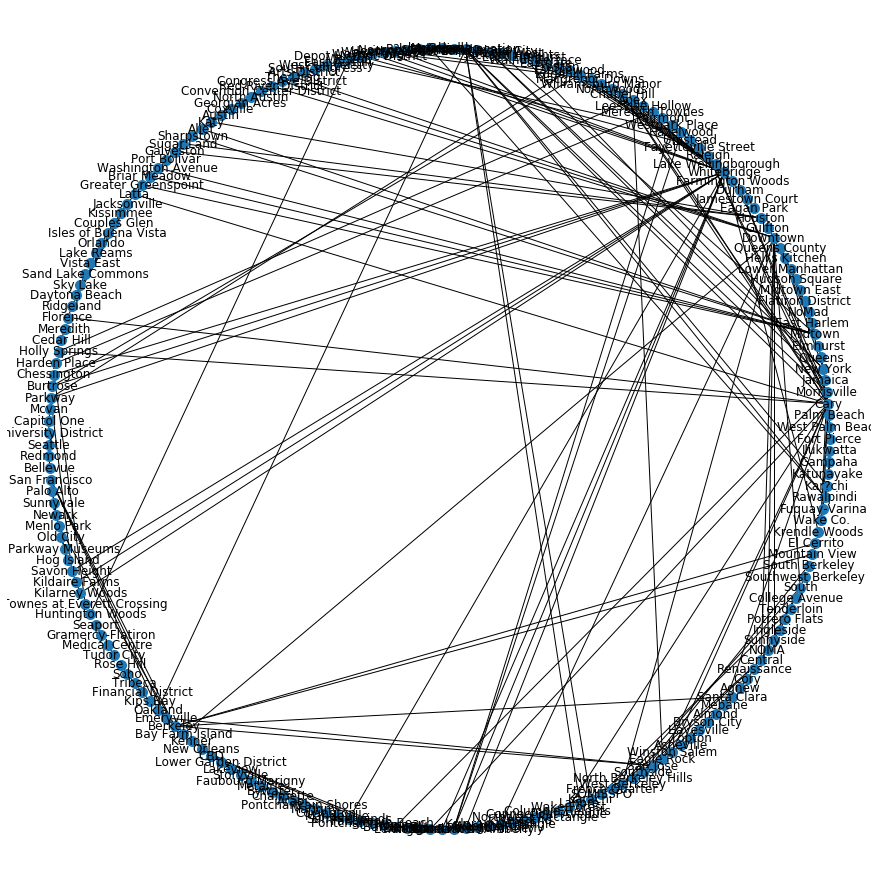

In [124]:
plt.figure(figsize=(12,12)) 
nx.draw_circular(g,with_labels=True,node_size=100)
plt.show()

In [125]:
#identifying which location is being visited more frequently (whether for pickup or dropoff)
location=[]
degree=[]
for node in g:
    location.append(node)
    degree.append(g.degree(node))

degree_dist_list = list (zip(location,degree))
degree_dist = pd.DataFrame(degree_dist_list, columns=['Location','Degree'])
degree_dist.sort_values(by="Degree",ascending=False)


,Location,Degree
25,Whitebridge,26
3,Cary,18
50,Unknown Location,15
9,Midtown,14
18,Downtown,12
...,...,...
89,Vista East,1
86,Isles of Buena Vista,1
81,Greater Greenspoint,1
79,Washington Avenue,1


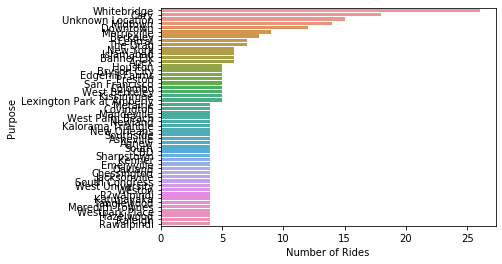

<Figure size 2160x2160 with 0 Axes>

In [126]:
ax = sns.barplot(x='Degree',y='Location',data=degree_dist[degree_dist['Degree']>=4],order=degree_dist[degree_dist['Degree']>=4].sort_values('Degree',ascending=False)['Location'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.figure(figsize=(30,30))
plt.show()

In [127]:
#since the highest number of rides were for meeting purposes, here I visualize this network of rides
g2= nx.Graph()
g2 = nx.from_pandas_edgelist(rides[rides['PURPOSE*']=='Meeting'],source='START*',target='STOP*')

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 71
Average degree:   1.7108


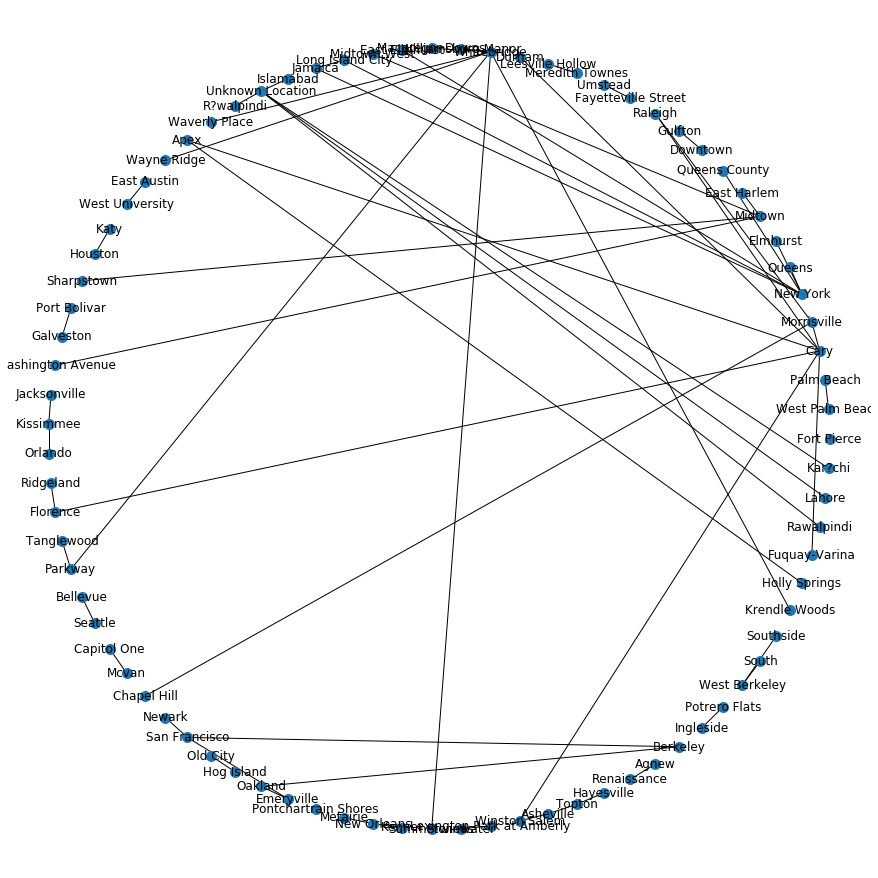

In [128]:
print (nx.info(g2))
plt.figure(figsize=(12,12)) 
nx.draw_shell(g2,with_labels=True,node_size=100)
plt.show()

In [129]:
location_2=[]
degree_2=[]
for node in g2:
    location_2.append(node)
    degree_2.append(g.degree(node))

degree_dist_list_2 = list (zip(location_2,degree_2))
degree_dist_2 = pd.DataFrame(degree_dist_list_2, columns=['Location','Degree'])
degree_dist_2.sort_values(by='Degree',ascending=False)

,Location,Degree
19,Whitebridge,26
3,Cary,18
27,Unknown Location,15
8,Midtown,14
11,Downtown,12
...,...,...
55,Hog Island,1
50,Mcvan,1
31,Wayne Ridge,1
32,East Austin,1
